# 手写数字识别与夸克、胶子喷注分类

庞龙刚@华中师范大学

## 学习目标

1. 接触成熟的机器学习库 tensorflow，keras
2. 使用 keras 构建简单的手写数字识别代码
3. 使用深度神经网络分类 Quark 与 Gluon 喷注

## 学习内容

1. 简单的手写数字识别，内容基于 keras 例子代码：https://keras.io/examples/vision/mnist_convnet/ 
2. 将此卷积神经网络 (convolution neural network) 用作夸克胶子喷注分类任务

In [1]:
import numpy as np
from tqdm import tqdm
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### 准备数据

手写数字识别任务：深度学习界的 “hello world”

目标：对手写数字 0 到 9 共 10 个数字进行识别

训练样本：60000 个

测试样本：10000 个

每个样本： 28 * 28 个像素， 一个标签（0-9）

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
x_train.shape
#plt.imshow(x_train[])

(60000, 28, 28, 1)

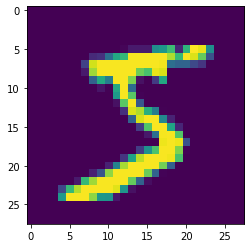

In [4]:
# 观察第一个样本及其标签
plt.imshow(x_train[0, :, :, 0])

In [5]:
# to_categorical 函数将 5 变成 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] 
# 这种表示称为 one-hot 表示， 用于多个类别的分类任务

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### 构建一个简单的卷积神经网络

In [6]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

### 训练神经网络

In [7]:
# 将 60000 个训练样本按照每 128 个分批输入神经网络 
batch_size = 128
# 神经网络遍历所有的训练数据 15 次（每个样本使用了15次）
epochs = 15
# 分类一般使用交叉熵损失函数 cross entropy
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 9s 22ms/step - loss: 0.3667 - accuracy: 0.8901 - val_loss: 0.0819 - val_accuracy: 0.9782
Epoch 2/15
422/422 [==============================] - 9s 22ms/step - loss: 0.1122 - accuracy: 0.9657 - val_loss: 0.0597 - val_accuracy: 0.9843
Epoch 3/15
422/422 [==============================] - 9s 22ms/step - loss: 0.0816 - accuracy: 0.9743 - val_loss: 0.0493 - val_accuracy: 0.9872
Epoch 4/15
422/422 [==============================] - 9s 22ms/step - loss: 0.0701 - accuracy: 0.9780 - val_loss: 0.0433 - val_accuracy: 0.9882
Epoch 5/15
422/422 [==============================] - 9s 22ms/step - loss: 0.0604 - accuracy: 0.9808 - val_loss: 0.0390 - val_accuracy: 0.9898
Epoch 6/15
422/422 [==============================] - 9s 22ms/step - loss: 0.0558 - accuracy: 0.9832 - val_loss: 0.0367 - val_accuracy: 0.9900
Epoch 7/15
422/422 [==============================] - 9s 22ms/step - loss: 0.0503 - accuracy: 0.9840 - val_loss: 0.0365 - val_accuracy: 0.9897

## 作业：夸克胶子喷注分类 (Quark Gluon Jet classification)

数据集： https://zenodo.org/record/3164691#.YGwuCOj7Q2w

下载：QG_jets.npz 

保存位置：当前目录/data/QG_jets.npz

根据夸克与胶子碎裂成的末态强子，判断这些强子来自于夸克还是胶子

    There are 20 files in each dataset, each in compressed NumPy format. Files including charm and bottom jets have 'withbc' in their filename. There are two arrays in each file

    X: (100000,M,4), exactly 50k quark and 50k gluon jets, randomly sorted, where M is the max multiplicity of the jets in that file (other jets have been padded with zero-particles), and the features of each particle are its pt, rapidity, azimuthal angle, and pdgid.
    y: (100000,), an array of labels for the jets where gluon is 0 and quark is 1.
    If you use this dataset, please cite this Zenodo record as well as the corresponding paper:

    P. T. Komiske, E. M. Metodiev, J. Thaler, Energy Flow Networks: Deep Sets for Particle Jets, JHEP 01 (2019) 121, arXiv:1810.05165.

### 读入数据 （Know your data)

In [8]:
with np.load("data/QG_jets.npz") as dat:
    x_qg = dat["X"]
    y_qg = dat["y"]

In [9]:
# 139 为喷注中最大粒子数量， 4 表示存储了 (pt, rapidity, phi, pdgid) 信息
# 数据中如果一个喷注总的粒子数小于 139， 用 (0, 0, 0, 0) 补全
x_qg.shape

(100000, 139, 4)

横动量 $p_t$, 快度(rapidity，一般用 y 表示) 以及方位角 $\phi$ 是对粒子四动量 $(E, p_x, p_y, p_z）$ 的另一种表示。

\begin{align}
p_t &= \sqrt{p_x^2 + p_y^2} \\
\phi & = {\rm arctan2}(p_y, p_x) \\
y &= {1 \over 2} \ln {E + p_z \over E - p_z} \\
\end{align}

In [10]:
y_qg.shape

(100000,)

In [11]:
# 输出训练样本 0 的前三行数据：pt, rapidity, phi, pdgid
# pdgid=22 表示 光子， pdgid = -211 表示 pion- 介子
 
print(x_qg[0, 0:3, :])

[[ 2.68769142e-01  3.56903171e-01  4.74138734e+00  2.20000000e+01]
 [ 1.60076377e-01 -2.55609533e-01  4.55022910e+00  2.20000000e+01]
 [ 1.14868731e+00 -6.24380156e-02  4.50385377e+00 -2.11000000e+02]]


In [12]:
# 标签: 0 for gluon; 1 for quark
y_qg[:20]

array([1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 0.])

## 数据可视化 （Know your data)

In [13]:
def visualize(eid=0):
    '''对第 eid 个样本进行可视化，探索数据'''
    dat = x_qg[eid]
    pt = dat[:, 0]
    rapidity = dat[:, 1]
    phi = dat[:, 2]
    plt.hist2d(rapidity, phi, 
               bins=28, cmin=0, cmax=5)
    # 这里为了可视化将 count>cmax 的像素设为 nan

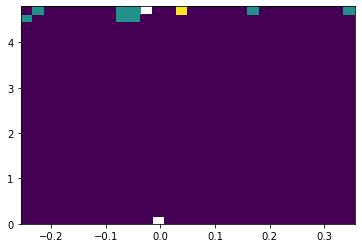

In [14]:
visualize(eid=0)

In [15]:
from ipywidgets import interact

interact(visualize, eid=range(0, 100))

interactive(children=(Dropdown(description='eid', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1…

<function __main__.visualize(eid=0)>

## 数据预处理

In [16]:
xmin, xmax = -1.7, 1.7
ymin, ymax = 0,  2*np.pi
# 将所有图像都对齐到 |y| < 1.7, phi in [0, 2pi] 范围
ranges = [[xmin, xmax], [ymin, ymax]]

def to_img(eid=0, bins=28):
    dat = x_qg[eid]
    rapidity = dat[:, 1]
    phi = dat[:, 2]
    # 将 （eta, phi) 分布转化为 2D 图像
    img, _, _ = np.histogram2d(rapidity, phi, 
                   bins = bins,
                   range=ranges,
                   normed=True)
    
    return img

In [17]:
num_events = len(x_qg)

x_qg_imgs = [to_img(i) for i in tqdm(range(num_events))]

100%|██████████| 100000/100000 [00:15<00:00, 6593.26it/s]


In [18]:
# x_qg_imgs 中每张图的最大值远大于 1，
# 使用所有事例中, 2d image 中像素最大的值进行缩放
x_qg_imgs = np.array(x_qg_imgs)

In [19]:
x_qg_imgs[0].max()

31.946835635779856

In [20]:
x_qg_imgs = x_qg_imgs / x_qg_imgs.max()

In [21]:
x_qg_imgs[0].max()

0.8768115942028987

In [22]:
x_qg_imgs.shape

(100000, 28, 28)

In [23]:
# 为了使用 mnist 所示卷积神经网络，将数据增加一个维度
x_qg_imgs = x_qg_imgs.reshape(100000, 28, 28, -1)

In [24]:
y_qg_onehot = keras.utils.to_categorical(y_qg, 2)

In [25]:
y_qg_onehot[0]

array([0., 1.], dtype=float32)

### 将数据分成训练集与测试集

这里我们使用 scikit-learn 中的 

[sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

将数据集划分成 训练集 与 测试集。

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_qg_imgs, y_qg_onehot, test_size=0.1)

In [28]:
x_train.shape

(90000, 28, 28, 1)

## 构造卷积神经网络

使用上面简单的 mnist 的例子，在其基础上修改，对 quark 和 gluon 喷注进行分类。

基线精度：loss: 0.4989 - accuracy: 0.7624 - val_loss: 0.4993 - val_accuracy: 0.7659

In [29]:
num_classes = 2
# 作业： 将 mnist 中的神经网络模型 model 部分 copy 到这个 cell 下部
# 注意：此时 num_classes 为 2， 只有 quark 和 gluon 两个类

### 训练神经网络

In [30]:
# 作业： 将 mnist 中神经网络训练部分代码 copy 到此 cell， 训练神经网络，观察 val_accuracy

## 结语：

1. 对于 Quark/Gluon 分类任务，有很多新的神经网络架构可以尝试，比如 点云神经网络，又如 Attention Network
2. 这门课不会过于深入，如果有同学想深入研究，需要自学一些知识，如：
   - Data Augmentation
   - Batch/Layer/Group Normalization
   - Point Cloud Network
   - 生成模型：VAE, GAN, Flow-based model
   - Interpretable Machine Learning